In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
import seaborn as sns

In [60]:
bands_frame = pd.read_csv("metal_bands.csv",index_col = 0)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
bands_frame = bands_frame[bands_frame["formed"] != "-"]
#bands_frame = bands_frame[bands_frame["split"] != "-"]
bands_frame["formed"] = bands_frame["formed"].apply(pd.to_numeric)
#bands_frame["split"] = bands_frame["split"].apply(pd.to_numeric)

In [61]:
print(bands_frame.head(20))

            band_name  fans  formed          origin split                                              style
0         Iron Maiden  4195    1975  United Kingdom     -                    New wave of british heavy,Heavy
1               Opeth  4147    1990          Sweden  1990   Extreme progressive,Progressive rock,Progressive
2           Metallica  3712    1981             USA     -                              Heavy,Bay area thrash
3            Megadeth  3105    1983             USA  1983                             Thrash,Heavy,Hard rock
4         Amon Amarth  3054    1988          Sweden     -                                      Melodic death
5              Slayer  2955    1981             USA  1981                                             Thrash
6               Death  2690    1983             USA  2001         Progressive death,Death,Progressive thrash
7       Dream Theater  2329    1985             USA  1985                                        Progressive
8       Black Sabba

# Tag 2

## Aufgaben:

- Verteilung der Fans
	
- Verteilung der Gründungsjahre
	
- Verteilung der Band-Lebensdauer (Setze für "-" 2017 ein)

In [62]:
biggest_styles = bands_frame.copy()
biggest_styles["style"] = biggest_styles["style"].map(lambda x: x.split(","))

all_styles = {}
for index, row in biggest_styles.iterrows():
    
    for item in row["style"]:

        if item in all_styles:
            all_styles[item] += 1
        else:
            all_styles[item] = 1
            
sorted_x = sorted(all_styles.items(), key=lambda kv: kv[1])
styles=[]
other = 0
for x in range(len(sorted_x)-1,len(sorted_x)-11,-1):
    styles.append((sorted_x[x][0]))
print(styles)

['Black', 'Death', 'Heavy', 'Thrash', 'Progressive', 'Doom', 'Power', 'Melodic death', 'Gothic', 'Hard rock']


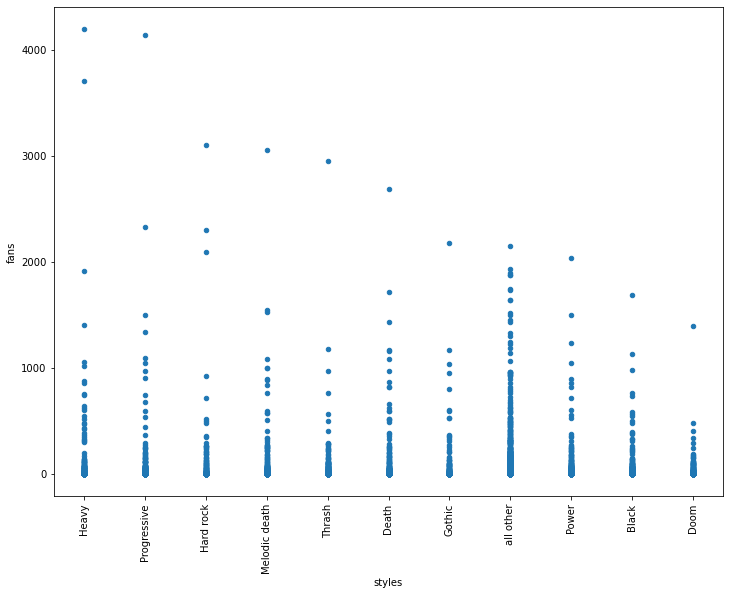

In [63]:

frame = bands_frame.copy()
#frame = frame[frame["origin"] == "Sweden"]
eval_frame = pd.DataFrame()
uniques = bands_frame["band_name"].unique()
eval_frame["band_name"] = frame["band_name"]
#eval_frame = eval_frame.set_index("band_name")
frame["style"] = frame["style"].map(lambda x: x.split(","))

    


for style in styles:  
    frame[style] = frame["style"].apply(lambda x: True if style in x else False)
    
frame["main_style"] = "all other"
for index,row in frame.iterrows():
    for style in styles:
        if row[style] == True:
            frame.at[index,"main_style"] = style
frame.plot.scatter(x="main_style",y="fans",figsize=(12,9))
plt.xlabel("styles")
plt.xticks(rotation = 90)
plt.show()

# for column in styles:
#     dicti = {}
#     for index, row in frame.iterrows():
#         if row[column] == True:
#             dicti[row["band_name"]] = row["fans"]        
#     eval_frame[column] = eval_frame["band_name"].map(dicti)

# break
# dicti1 = {}
# for colum in styles:
#     liste = eval_frame[colum].values
#     liste = liste[~np.isnan(liste)]
#     liste = [i for i in liste if i != 0]
#     dicti1[colum] = liste

# labels, data = dicti1.keys(), dicti1.values()

# plt.boxplot(data,notch=True,showfliers= False)

# #plt.scatter(labels,data)
# plt.ylim(0,300)
# plt.xticks(rotation=90)
# plt.xticks(range(1, len(labels) + 1), labels)
# plt.show()
# plt.close()





    



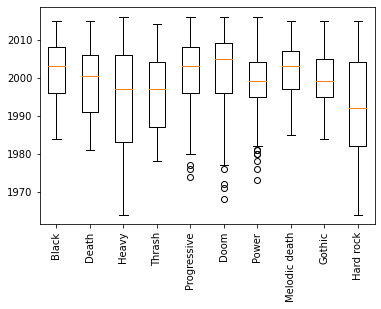

In [64]:
frame = bands_frame.copy()
eval_frame = pd.DataFrame()
uniques = bands_frame["band_name"].unique()
#eval_frame["band_name"] = frame["band_name"]
#eval_frame = eval_frame.set_index("band_name")
frame["style"] = frame["style"].map(lambda x: x.split(","))

    


for style in styles:  
    frame[style] = frame["style"].apply(lambda x: True if style in x else False)
    
dicti1 = {}
for style in styles:
    eval_frame = frame[frame[style]==True]
    #print(eval_frame.shape)
    dicti1[style] = (frame[frame[style]==True]["formed"].values.tolist()) 

labels, data = dicti1.keys(), dicti1.values()
#print(data)

plt.boxplot(data)
plt.xticks(rotation=90)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

<AxesSubplot:xlabel='formed'>

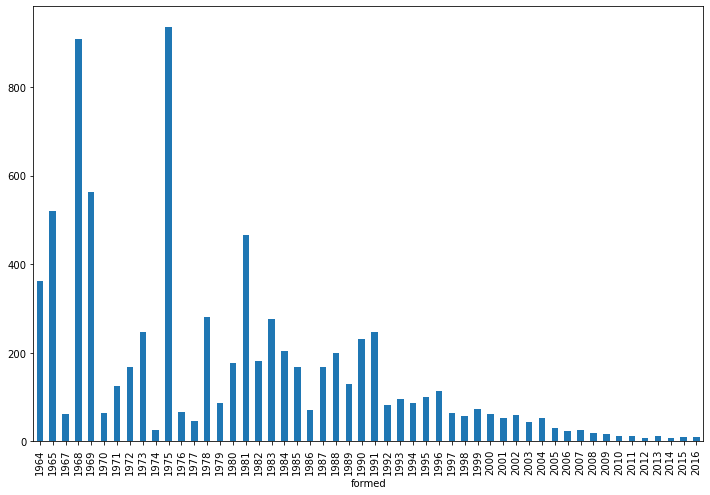

In [70]:
eval_frame = bands_frame.copy()
eval_frame.groupby("formed").fans.mean().plot(kind="bar",figsize=(12,8))

<AxesSubplot:xlabel='lebensdauer'>

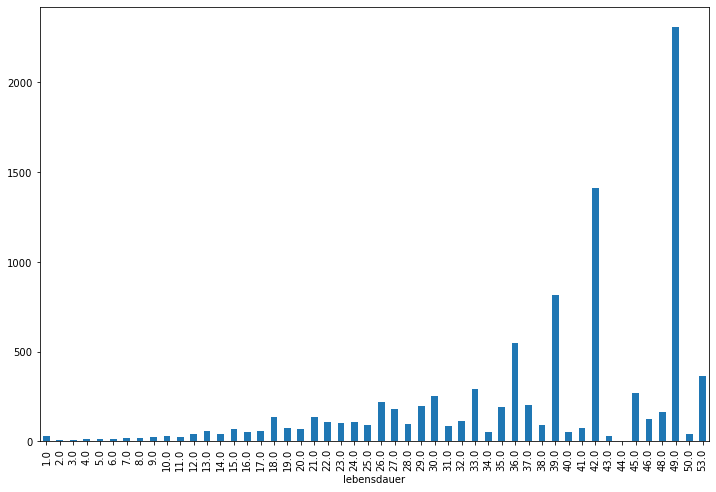

In [66]:
for index,row in eval_frame.iterrows():
    if row["split"] == "-":        
        eval_frame.at[index,"lebensdauer"] = abs(2017-row["formed"])
    else:       
        eval_frame.at[index,"lebensdauer"] = abs(pd.to_numeric(row["split"])-row["formed"])
    continue
eval_frame[eval_frame["lebensdauer"] != 0].groupby("lebensdauer").fans.mean().plot(kind="bar",figsize=(12,8))


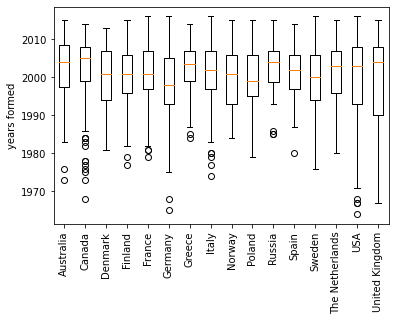

In [67]:
frame_3 = bands_frame.copy()
ix_dict = frame_3.groupby("origin").formed.indices
new_frame = pd.DataFrame()
dicti = {}
for key in ix_dict: 
    liste = frame_3.iloc[ix_dict[key]]["formed"].values.tolist()
    if len(liste) < 60:
        continue
    dicti[key]  = liste
    #print(liste)

labels, data = dicti.keys(), dicti.values()


plt.boxplot(data)
plt.ylabel("years formed")
plt.xticks(rotation=90)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()
    

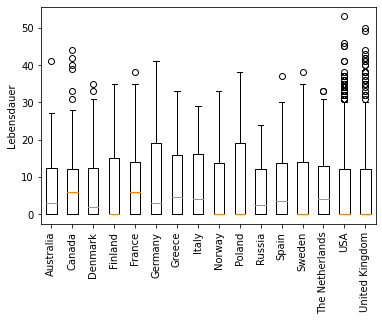

In [68]:
frame_3 = eval_frame.copy()
ix_dict = frame_3.groupby("origin").lebensdauer.indices

new_frame = pd.DataFrame()
dicti = {}
for key in ix_dict: 
    liste = frame_3.iloc[ix_dict[key]]["lebensdauer"].values.tolist()
    if len(liste) < 60:
        continue
    dicti[key]  = liste
    #print(liste)

labels, data = dicti.keys(), dicti.values()


plt.boxplot(data)
plt.ylabel("Lebensdauer")
plt.xticks(rotation=90)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()

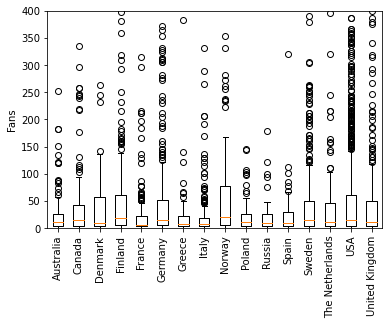

In [69]:
frame_3 = eval_frame.copy()
ix_dict = frame_3.groupby("origin").fans.indices

new_frame = pd.DataFrame()
dicti = {}
for key in ix_dict: 
    liste = frame_3.iloc[ix_dict[key]]["fans"].values.tolist()
    if len(liste) < 60:
        continue
    dicti[key]  = liste
    #print(liste)

labels, data = dicti.keys(), dicti.values()


plt.boxplot(data,showfliers=True)
plt.ylabel("Fans")
plt.ylim(0,400)
plt.xticks(rotation=90)
plt.xticks(range(1, len(labels) + 1), labels)
plt.show()